In [1]:
import os
import os.path as op
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy.ma as ma
from scipy import stats

## R01 Data

In [2]:
file_list = [] # This is going to be the list of all filenames that will be included in the analysis

path = '~/Desktop/temp_storage/R01_MPT_Data/csvs/' # The folder where the Deff csv files are located

treatments = ['NT', 'OGD', 'OGD_AZ']
regions = ['ganglia', 'hippocampus', 'thalamus']
slices = 2
vids = 3

for treat in treatments:
    for slic in range(1, slices+1):
        for reg in regions:
            for vid in range(1, vids+1):
                file_list.append('{}_slice_{}_{}_vid_{}'.format(treat, slic, reg, vid))

In [3]:
file_list

['NT_slice_1_ganglia_vid_1',
 'NT_slice_1_ganglia_vid_2',
 'NT_slice_1_ganglia_vid_3',
 'NT_slice_1_hippocampus_vid_1',
 'NT_slice_1_hippocampus_vid_2',
 'NT_slice_1_hippocampus_vid_3',
 'NT_slice_1_thalamus_vid_1',
 'NT_slice_1_thalamus_vid_2',
 'NT_slice_1_thalamus_vid_3',
 'NT_slice_2_ganglia_vid_1',
 'NT_slice_2_ganglia_vid_2',
 'NT_slice_2_ganglia_vid_3',
 'NT_slice_2_hippocampus_vid_1',
 'NT_slice_2_hippocampus_vid_2',
 'NT_slice_2_hippocampus_vid_3',
 'NT_slice_2_thalamus_vid_1',
 'NT_slice_2_thalamus_vid_2',
 'NT_slice_2_thalamus_vid_3',
 'OGD_slice_1_ganglia_vid_1',
 'OGD_slice_1_ganglia_vid_2',
 'OGD_slice_1_ganglia_vid_3',
 'OGD_slice_1_hippocampus_vid_1',
 'OGD_slice_1_hippocampus_vid_2',
 'OGD_slice_1_hippocampus_vid_3',
 'OGD_slice_1_thalamus_vid_1',
 'OGD_slice_1_thalamus_vid_2',
 'OGD_slice_1_thalamus_vid_3',
 'OGD_slice_2_ganglia_vid_1',
 'OGD_slice_2_ganglia_vid_2',
 'OGD_slice_2_ganglia_vid_3',
 'OGD_slice_2_hippocampus_vid_1',
 'OGD_slice_2_hippocampus_vid_2',
 'OGD

In [4]:
# Assigning variables
k = 1.3806503e-23 # m^2 kg s^-2 K
T = 293.15 # K
mu = 0.001 # kg m^-1 s^-1

r_s = 26 # nm
r_f = 0.3 # nm

Do = k*T/(6*math.pi*mu*r_s*1e-9)*1e12 # um^2/s
print(Do)

8.25846094056375


In [6]:
NT_ganglia_track = file_list[0:3] + file_list[9:12]
NT_hippocampus_track = file_list[3:6]+file_list[12:15]
NT_thalamus_track = file_list[6:9]+file_list[15:18]
NT_track = NT_ganglia_track+NT_hippocampus_track+NT_thalamus_track
OGD_ganglia_track = file_list[18:21] + file_list[27:30]
OGD_hippocampus_track = file_list[21:24]+file_list[30:33]
OGD_thalamus_track = file_list[24:27]+file_list[33:36]
OGD_track = OGD_ganglia_track+OGD_hippocampus_track+OGD_thalamus_track
OGD_AZ_ganglia_track = file_list[36:39] + file_list[45:48]
OGD_AZ_hippocampus_track = file_list[39:42]+file_list[48:51]
OGD_AZ_thalamus_track = file_list[42:45]+file_list[51:54]
OGD_AZ_track = OGD_AZ_ganglia_track+OGD_AZ_hippocampus_track+OGD_AZ_thalamus_track

In [7]:
OGD_AZ_track

['OGD_AZ_slice_1_ganglia_vid_1',
 'OGD_AZ_slice_1_ganglia_vid_2',
 'OGD_AZ_slice_1_ganglia_vid_3',
 'OGD_AZ_slice_2_ganglia_vid_1',
 'OGD_AZ_slice_2_ganglia_vid_2',
 'OGD_AZ_slice_2_ganglia_vid_3',
 'OGD_AZ_slice_1_hippocampus_vid_1',
 'OGD_AZ_slice_1_hippocampus_vid_2',
 'OGD_AZ_slice_1_hippocampus_vid_3',
 'OGD_AZ_slice_2_hippocampus_vid_1',
 'OGD_AZ_slice_2_hippocampus_vid_2',
 'OGD_AZ_slice_2_hippocampus_vid_3',
 'OGD_AZ_slice_1_thalamus_vid_1',
 'OGD_AZ_slice_1_thalamus_vid_2',
 'OGD_AZ_slice_1_thalamus_vid_3',
 'OGD_AZ_slice_2_thalamus_vid_1',
 'OGD_AZ_slice_2_thalamus_vid_2',
 'OGD_AZ_slice_2_thalamus_vid_3']

In [8]:
Deff_vals_NT_ganglia = pd.DataFrame()

for file in NT_ganglia_track:
    temp = pd.read_csv(path+'{}_stats.csv'.format(file))
    Deff_vals_NT_ganglia = pd.concat([Deff_vals_NT_ganglia, temp], ignore_index=True)

Deff_vals_NT_ganglia.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)
Deff_vals_NT_ganglia['Pore size [nm]'] = 2*((r_s+r_f)/((-4/math.pi*(np.log((Deff_vals_NT_ganglia['Deff [um^2/s]'])/Do)))**(1/2))-r_f)
Deff_vals_NT_ganglia = Deff_vals_NT_ganglia.dropna()
Deff_vals_NT_ganglia = Deff_vals_NT_ganglia.reset_index(drop=True)

Deff_vals_NT_hippocampus = pd.DataFrame()

for file in NT_hippocampus_track:
    temp = pd.read_csv(path+'{}_stats.csv'.format(file))
    Deff_vals_NT_hippocampus = pd.concat([Deff_vals_NT_hippocampus, temp], ignore_index=True)

Deff_vals_NT_hippocampus.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)
Deff_vals_NT_hippocampus['Pore size [nm]'] = 2*((r_s+r_f)/((-4/math.pi*(np.log((Deff_vals_NT_hippocampus['Deff [um^2/s]'])/Do)))**(1/2))-r_f)
Deff_vals_NT_hippocampus = Deff_vals_NT_hippocampus.dropna()
Deff_vals_NT_hippocampus = Deff_vals_NT_hippocampus.reset_index(drop=True)

Deff_vals_NT_thalamus = pd.DataFrame()

for file in NT_thalamus_track:
    temp = pd.read_csv(path+'{}_stats.csv'.format(file))
    Deff_vals_NT_thalamus = pd.concat([Deff_vals_NT_thalamus, temp], ignore_index=True)

Deff_vals_NT_thalamus.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)
Deff_vals_NT_thalamus['Pore size [nm]'] = 2*((r_s+r_f)/((-4/math.pi*(np.log((Deff_vals_NT_thalamus['Deff [um^2/s]'])/Do)))**(1/2))-r_f)
Deff_vals_NT_thalamus = Deff_vals_NT_thalamus.dropna()
Deff_vals_NT_thalamus = Deff_vals_NT_thalamus.reset_index(drop=True)

In [9]:
Deff_vals_OGD_ganglia = pd.DataFrame()

for file in OGD_ganglia_track:
    temp = pd.read_csv(path+'{}_stats.csv'.format(file))
    Deff_vals_OGD_ganglia = pd.concat([Deff_vals_OGD_ganglia, temp], ignore_index=True)

Deff_vals_OGD_ganglia.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)
Deff_vals_OGD_ganglia['Pore size [nm]'] = 2*((r_s+r_f)/((-4/math.pi*(np.log((Deff_vals_OGD_ganglia['Deff [um^2/s]'])/Do)))**(1/2))-r_f)
Deff_vals_OGD_ganglia = Deff_vals_OGD_ganglia.dropna()
Deff_vals_OGD_ganglia = Deff_vals_OGD_ganglia.reset_index(drop=True)

Deff_vals_OGD_hippocampus = pd.DataFrame()

for file in OGD_hippocampus_track:
    temp = pd.read_csv(path+'{}_stats.csv'.format(file))
    Deff_vals_OGD_hippocampus = pd.concat([Deff_vals_OGD_hippocampus, temp], ignore_index=True)

Deff_vals_OGD_hippocampus.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)
Deff_vals_OGD_hippocampus['Pore size [nm]'] = 2*((r_s+r_f)/((-4/math.pi*(np.log((Deff_vals_OGD_hippocampus['Deff [um^2/s]'])/Do)))**(1/2))-r_f)
Deff_vals_OGD_hippocampus = Deff_vals_OGD_hippocampus.dropna()
Deff_vals_OGD_hippocampus = Deff_vals_OGD_hippocampus.reset_index(drop=True)

Deff_vals_OGD_thalamus = pd.DataFrame()

for file in OGD_thalamus_track:
    temp = pd.read_csv(path+'{}_stats.csv'.format(file))
    Deff_vals_OGD_thalamus = pd.concat([Deff_vals_OGD_thalamus, temp], ignore_index=True)

Deff_vals_OGD_thalamus.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)
Deff_vals_OGD_thalamus['Pore size [nm]'] = 2*((r_s+r_f)/((-4/math.pi*(np.log((Deff_vals_OGD_thalamus['Deff [um^2/s]'])/Do)))**(1/2))-r_f)
Deff_vals_OGD_thalamus = Deff_vals_OGD_thalamus.dropna()
Deff_vals_OGD_thalamus = Deff_vals_OGD_thalamus.reset_index(drop=True)

In [10]:
Deff_vals_OGD_AZ_ganglia = pd.DataFrame()

for file in OGD_AZ_ganglia_track:
    temp = pd.read_csv(path+'{}_stats.csv'.format(file))
    Deff_vals_OGD_AZ_ganglia = pd.concat([Deff_vals_OGD_AZ_ganglia, temp], ignore_index=True)

Deff_vals_OGD_AZ_ganglia.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)
Deff_vals_OGD_AZ_ganglia['Pore size [nm]'] = 2*((r_s+r_f)/((-4/math.pi*(np.log((Deff_vals_OGD_AZ_ganglia['Deff [um^2/s]'])/Do)))**(1/2))-r_f)
Deff_vals_OGD_AZ_ganglia = Deff_vals_OGD_AZ_ganglia.dropna()
Deff_vals_OGD_AZ_ganglia = Deff_vals_OGD_AZ_ganglia.reset_index(drop=True)

Deff_vals_OGD_AZ_hippocampus = pd.DataFrame()

for file in OGD_AZ_hippocampus_track:
    temp = pd.read_csv(path+'{}_stats.csv'.format(file))
    Deff_vals_OGD_AZ_hippocampus = pd.concat([Deff_vals_OGD_AZ_hippocampus, temp], ignore_index=True)

Deff_vals_OGD_AZ_hippocampus.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)
Deff_vals_OGD_AZ_hippocampus['Pore size [nm]'] = 2*((r_s+r_f)/((-4/math.pi*(np.log((Deff_vals_OGD_AZ_hippocampus['Deff [um^2/s]'])/Do)))**(1/2))-r_f)
Deff_vals_OGD_AZ_hippocampus = Deff_vals_OGD_AZ_hippocampus.dropna()
Deff_vals_OGD_AZ_hippocampus = Deff_vals_OGD_AZ_hippocampus.reset_index(drop=True)

Deff_vals_OGD_AZ_thalamus = pd.DataFrame()

for file in OGD_AZ_thalamus_track:
    temp = pd.read_csv(path+'{}_stats.csv'.format(file))
    Deff_vals_OGD_AZ_thalamus = pd.concat([Deff_vals_OGD_AZ_thalamus, temp], ignore_index=True)

Deff_vals_OGD_AZ_thalamus.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)
Deff_vals_OGD_AZ_thalamus['Pore size [nm]'] = 2*((r_s+r_f)/((-4/math.pi*(np.log((Deff_vals_OGD_AZ_thalamus['Deff [um^2/s]'])/Do)))**(1/2))-r_f)
Deff_vals_OGD_AZ_thalamus = Deff_vals_OGD_AZ_thalamus.dropna()
Deff_vals_OGD_AZ_thalamus = Deff_vals_OGD_AZ_thalamus.reset_index(drop=True)

/Users/mikemckenna/anaconda3/envs/image_analysis/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


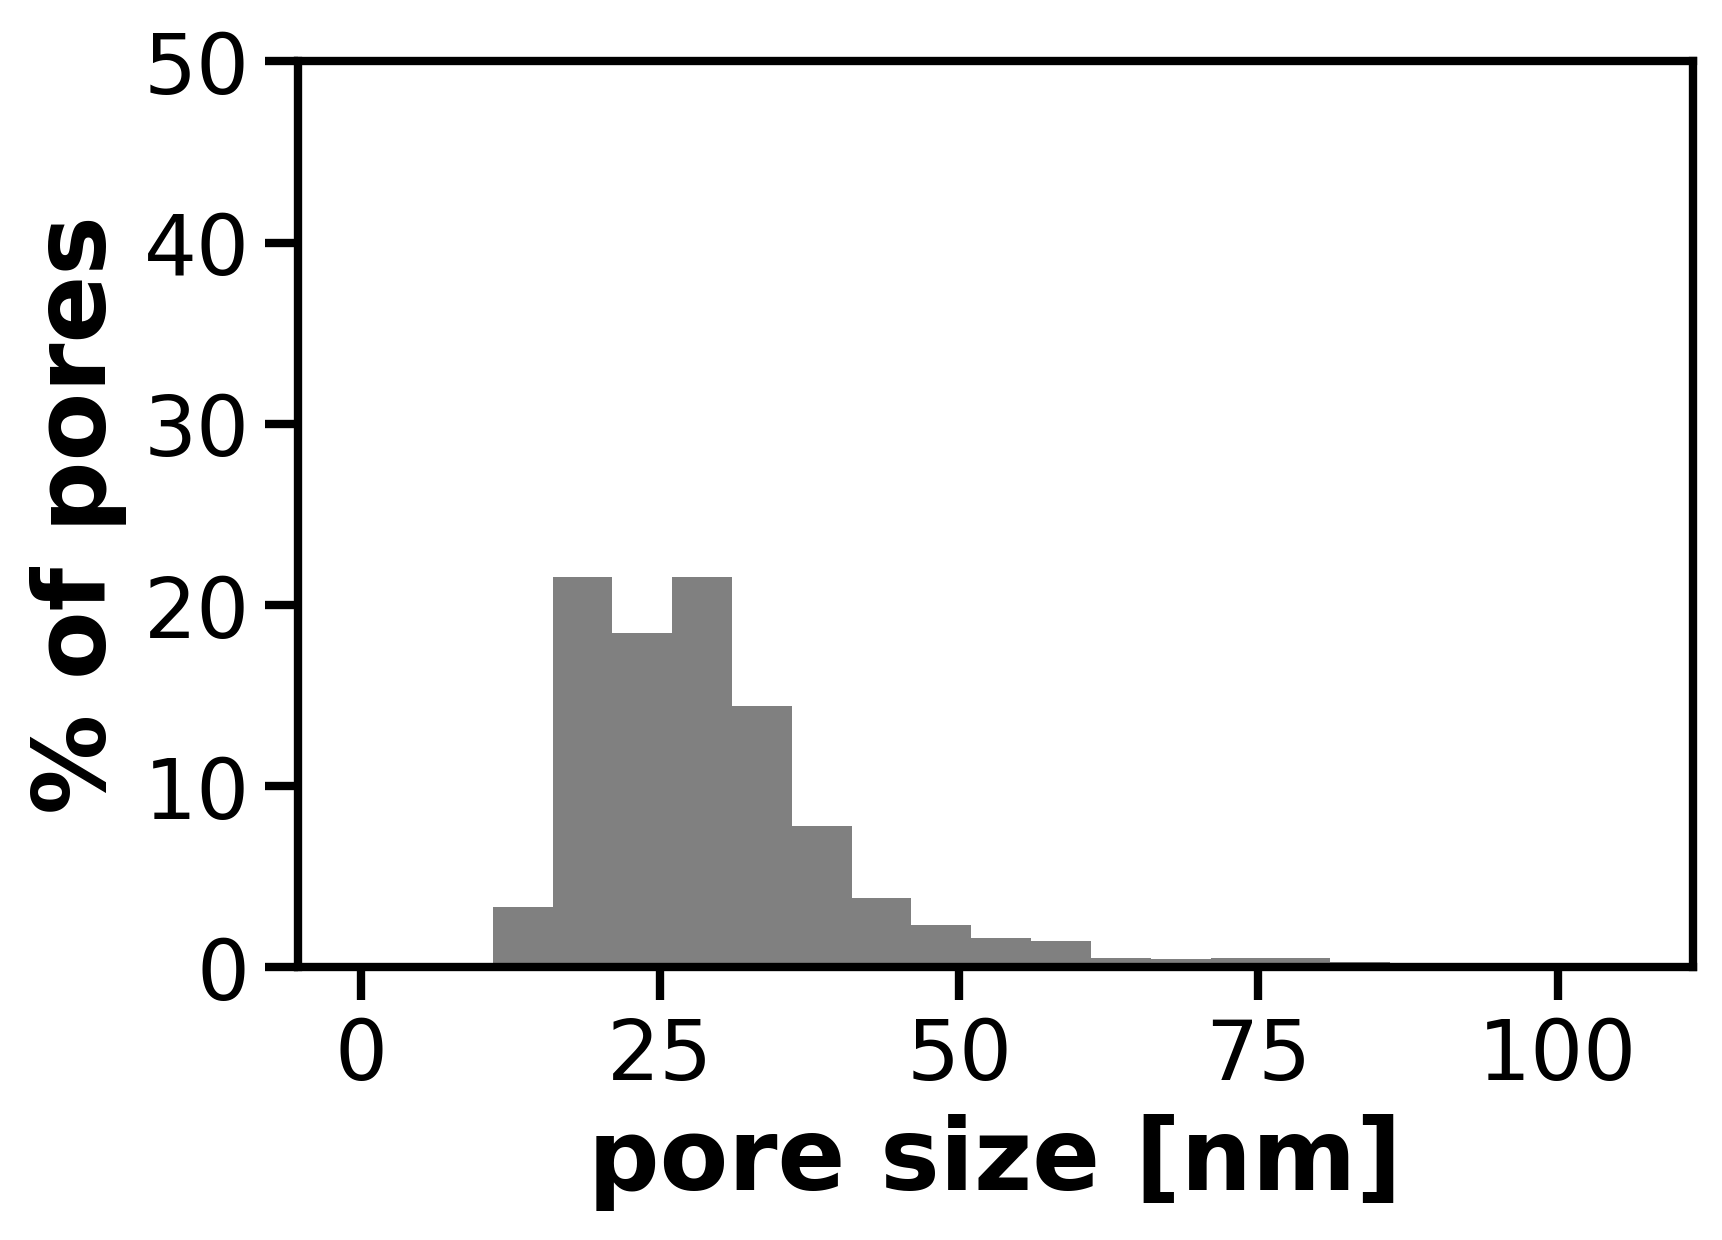

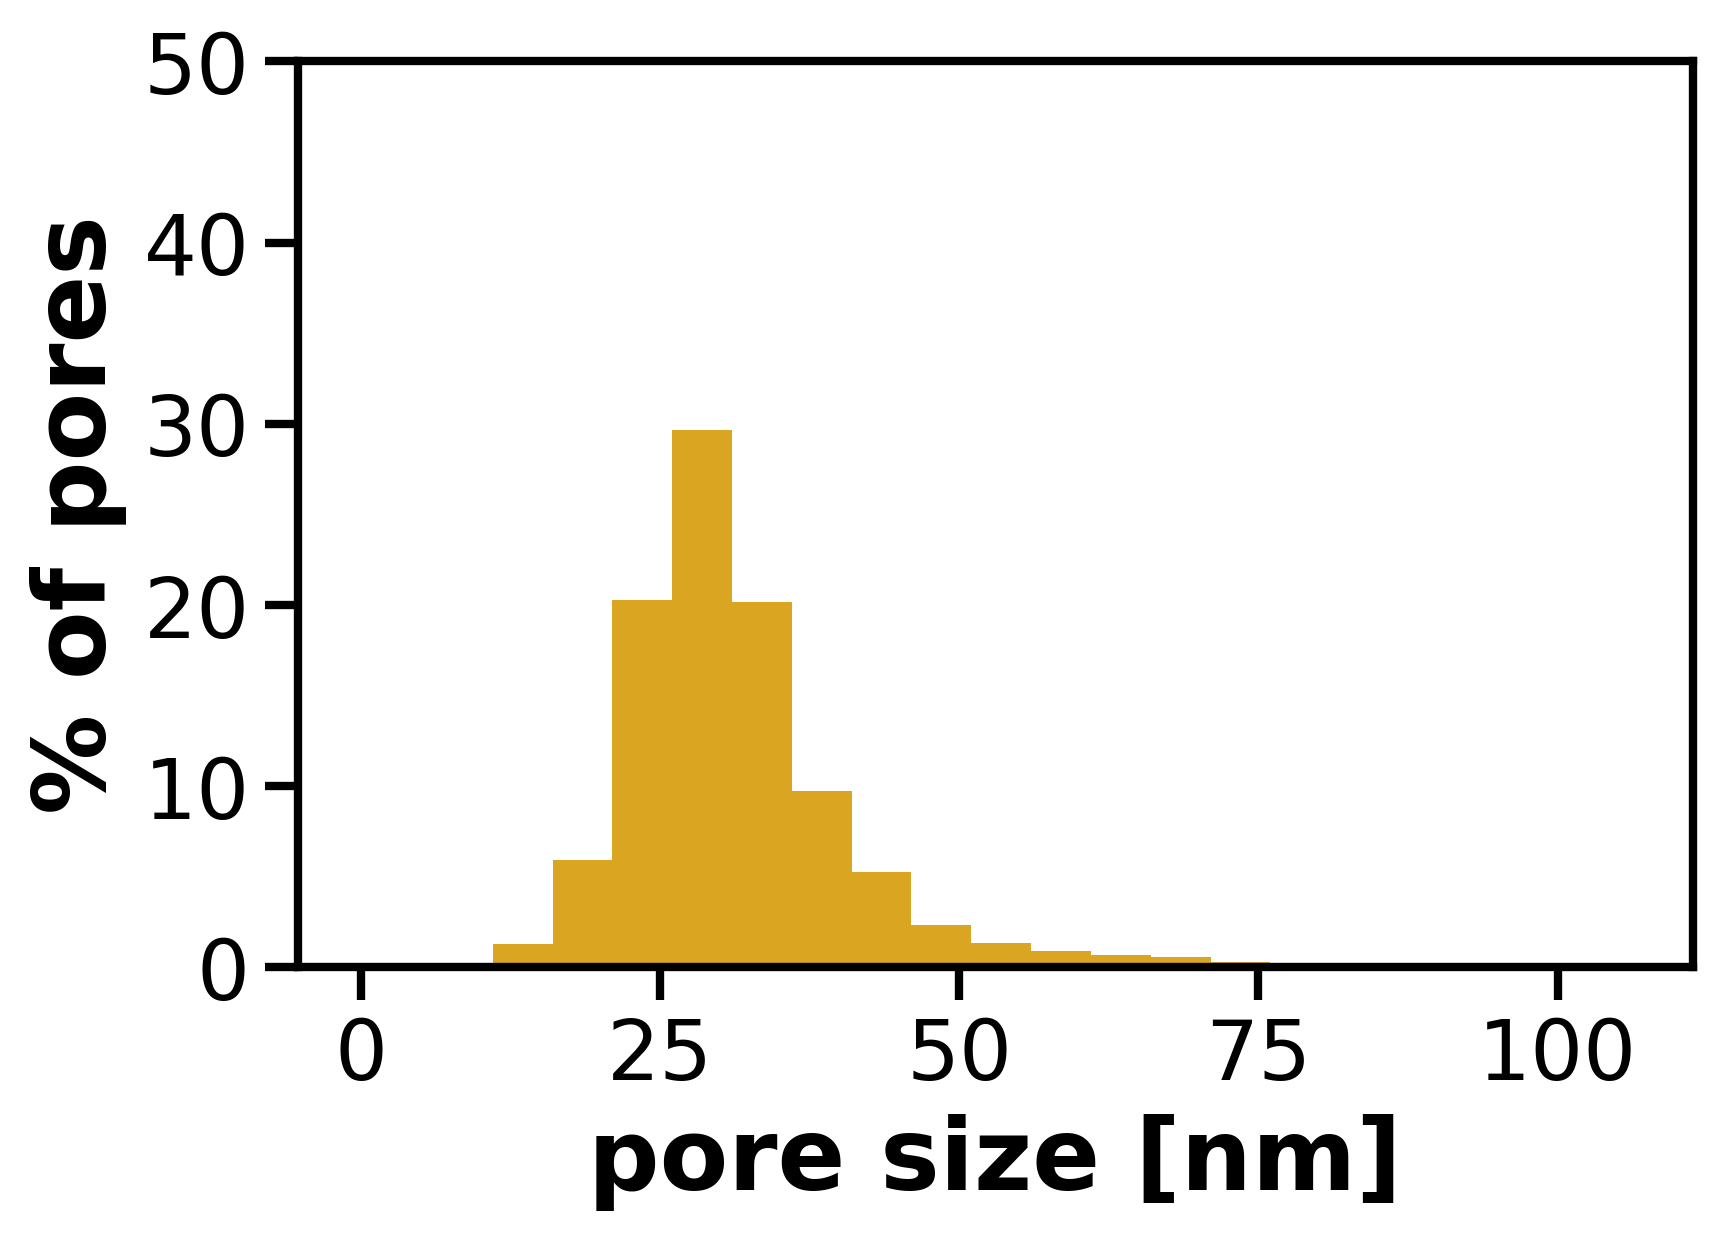

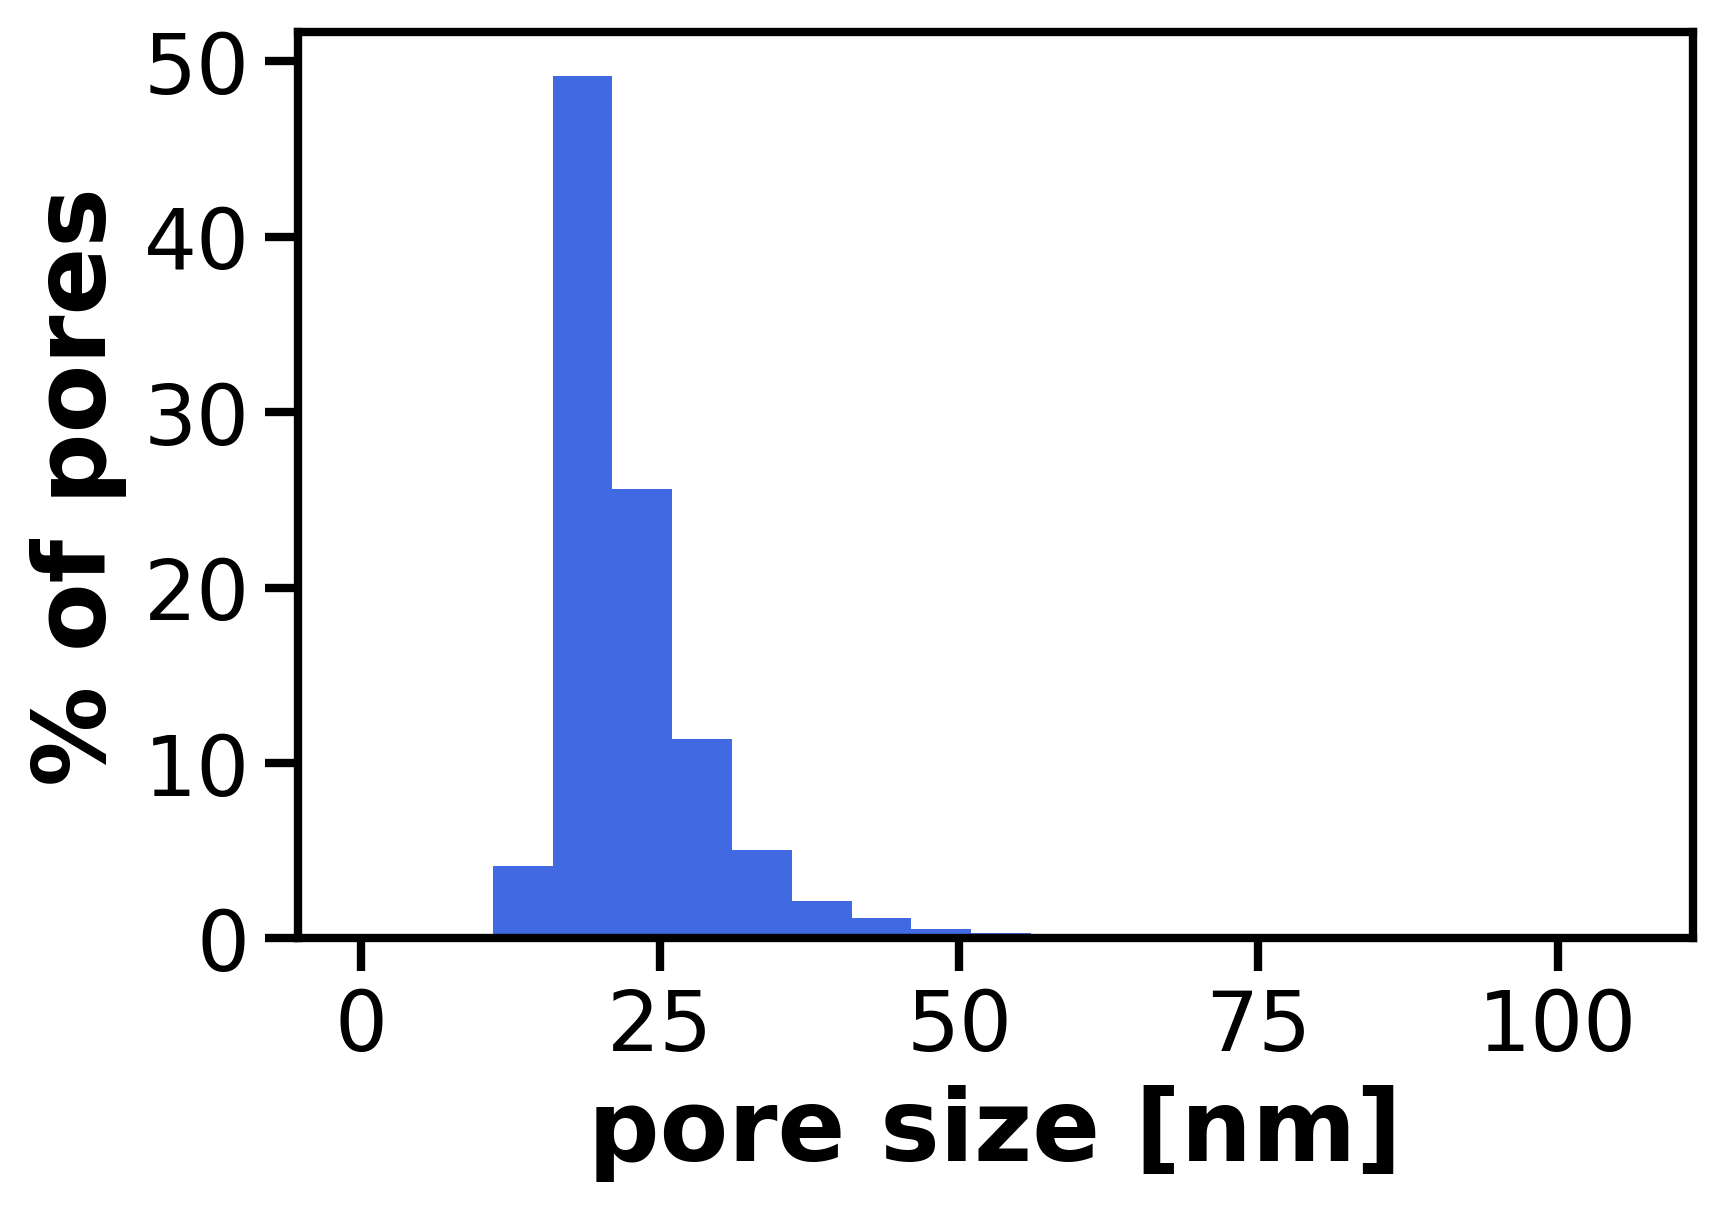

In [25]:
plt.figure(1, dpi=300).tight_layout()
ax = plt.gca()
ax = Deff_vals_NT_ganglia["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_NT_ganglia.index) / len(Deff_vals_NT_ganglia.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96,101,106],color='grey')
ax.yaxis.set_ticks(np.arange(0, 51, 10))
ax.set_ylabel('% of pores', fontsize=24, weight='bold')
ax.set_xlabel('pore size [nm]', fontsize=24, weight='bold')
ax.tick_params(labelsize=20, length=8, width=2)
ax.tick_params(which = 'minor', length=5, width=1)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

plt.figure(2, dpi=300).tight_layout()
ax2.set_title('Normal control')
ax2 = Deff_vals_OGD_ganglia["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_OGD_ganglia.index) / len(Deff_vals_OGD_ganglia.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96,101,106], color='goldenrod')
ax2.yaxis.set_ticks(np.arange(0, 51, 10))
ax2.set_ylabel('% of pores', fontsize=24, weight='bold')
ax2.set_xlabel('pore size [nm]', fontsize=24, weight='bold')
ax2.tick_params(labelsize=20, length=8, width=2)
ax2.tick_params(which = 'minor', length=5, width=1)
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)

plt.figure(3, dpi=300).tight_layout()   
ax3 = fig.add_subplot(3,1,3)
ax3 = Deff_vals_OGD_AZ_ganglia["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_OGD_AZ_ganglia.index) / len(Deff_vals_OGD_AZ_ganglia.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96,101,106], color='royalblue')
ax3.yaxis.set_ticks(np.arange(0, 51, 10))
ax3.set_ylabel('% of pores', fontsize=24, weight='bold')
ax3.set_xlabel('pore size [nm]', fontsize=24, weight='bold')
ax3.tick_params(labelsize=20, length=8, width=2)
ax3.tick_params(which = 'minor', length=5, width=1)
for axis in ['top','bottom','left','right']:
    ax3.spines[axis].set_linewidth(2)



In [12]:
print(min(Deff_vals_NT_ganglia["Pore size [nm]"]),',', max(Deff_vals_NT_ganglia["Pore size [nm]"]),',',Deff_vals_NT_ganglia["Pore size [nm]"].mean())
print(min(Deff_vals_OGD_ganglia["Pore size [nm]"]),',', max(Deff_vals_OGD_ganglia["Pore size [nm]"]),',',Deff_vals_OGD_ganglia["Pore size [nm]"].mean())
print(min(Deff_vals_OGD_AZ_ganglia["Pore size [nm]"]),',', max(Deff_vals_OGD_AZ_ganglia["Pore size [nm]"]),',',Deff_vals_OGD_AZ_ganglia["Pore size [nm]"].mean())


13.146505989129738 , 489.0783943805913 , 30.682737308134293
12.32192365936138 , 386.85430598253225 , 32.54366520207565
12.204084108870704 , 580.9612246994645 , 22.821388406823736


In [26]:
pro_50 = 0
pro_100 = 0
pro_200 = 0
total = len(Deff_vals_P14)

for traj in range(0,total):
    if Deff_vals_P14['Pore size [nm]'][traj] >= 50:
        pro_50 += 1
        if Deff_vals_P14['Pore size [nm]'][traj] >= 100:
            pro_100 += 1
            if Deff_vals_P14['Pore size [nm]'][traj] >= 200:
                pro_200 += 1

                
percent_50 = pro_50/total*100
percent_100 = pro_100/total*100
percent_200 = pro_200/total*100

In [27]:
print(percent_50)
print(percent_100)
print(percent_200)

31.3204146011717
6.399278954484002
1.1942316358720144


/Users/mikemckenna/anaconda3/envs/image_analysis/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


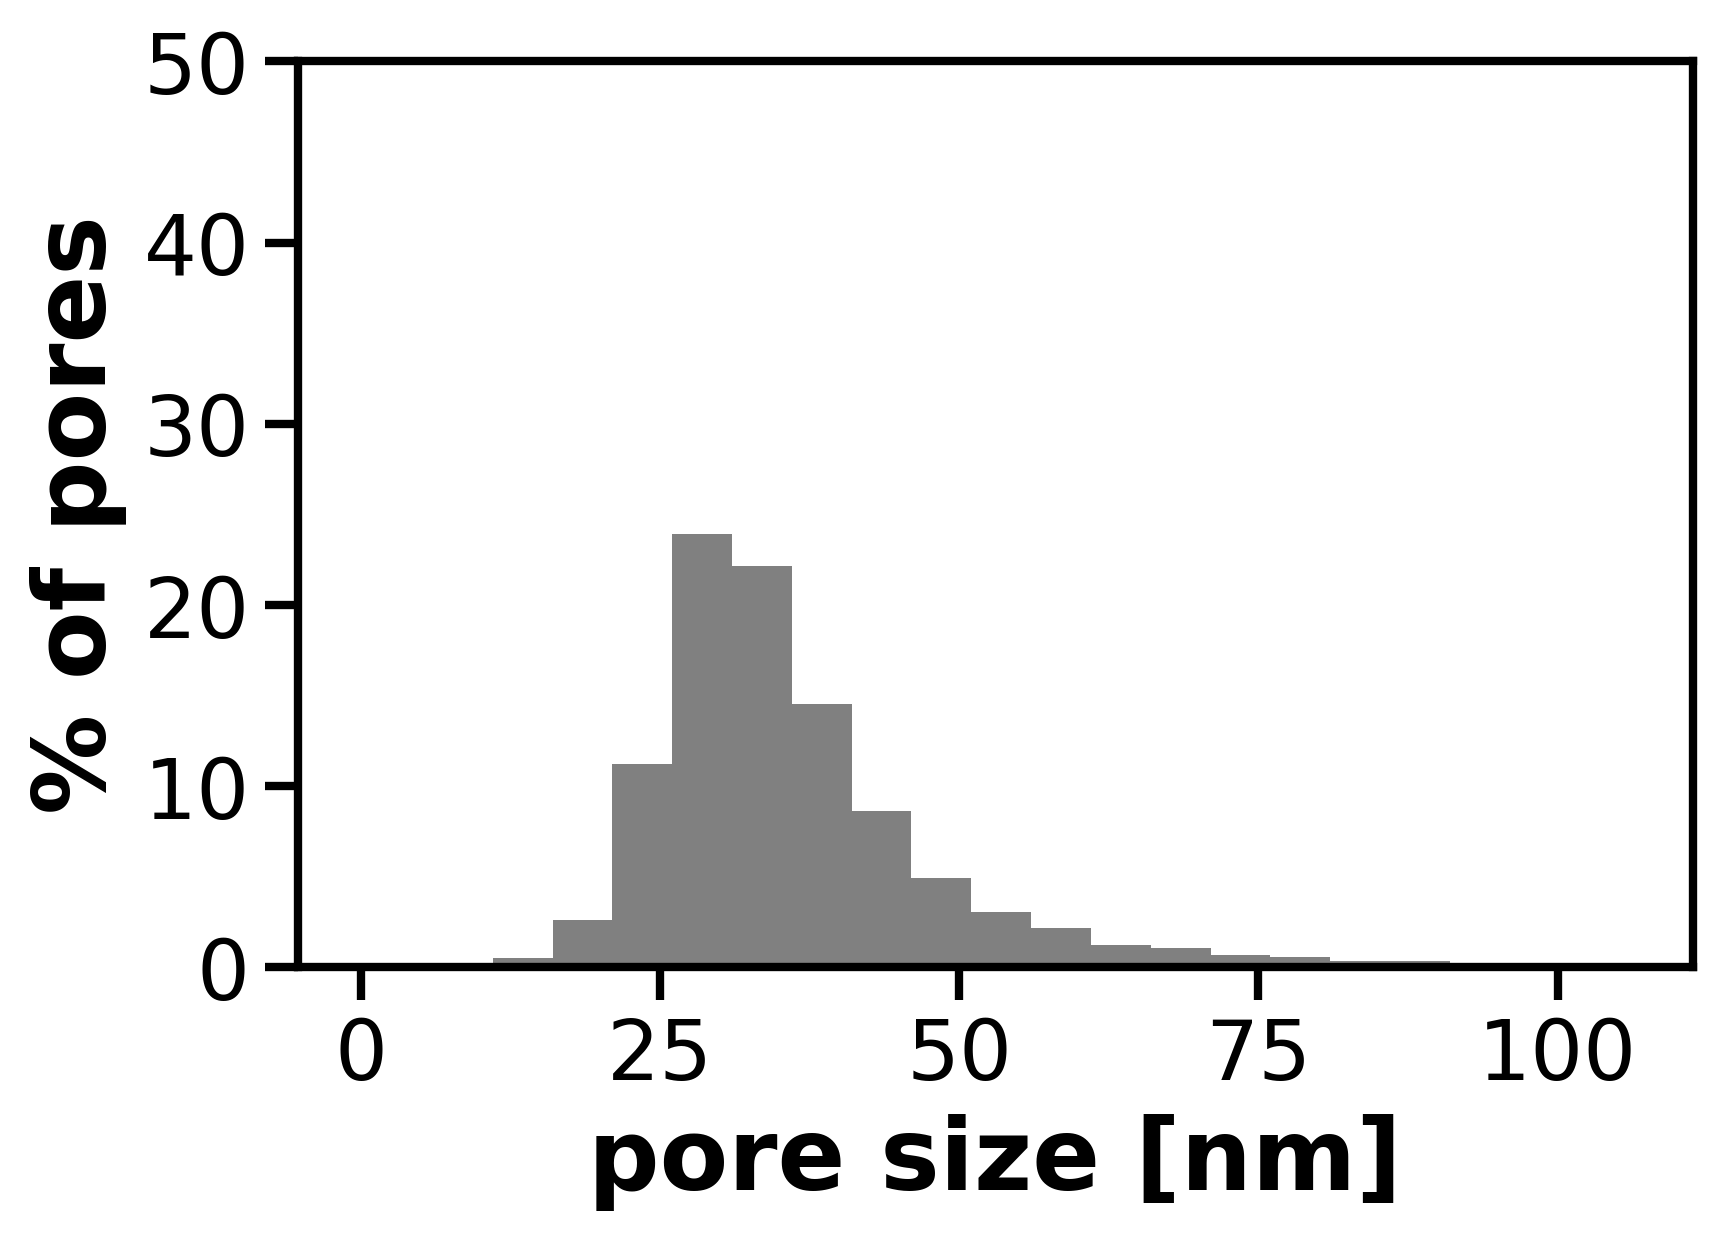

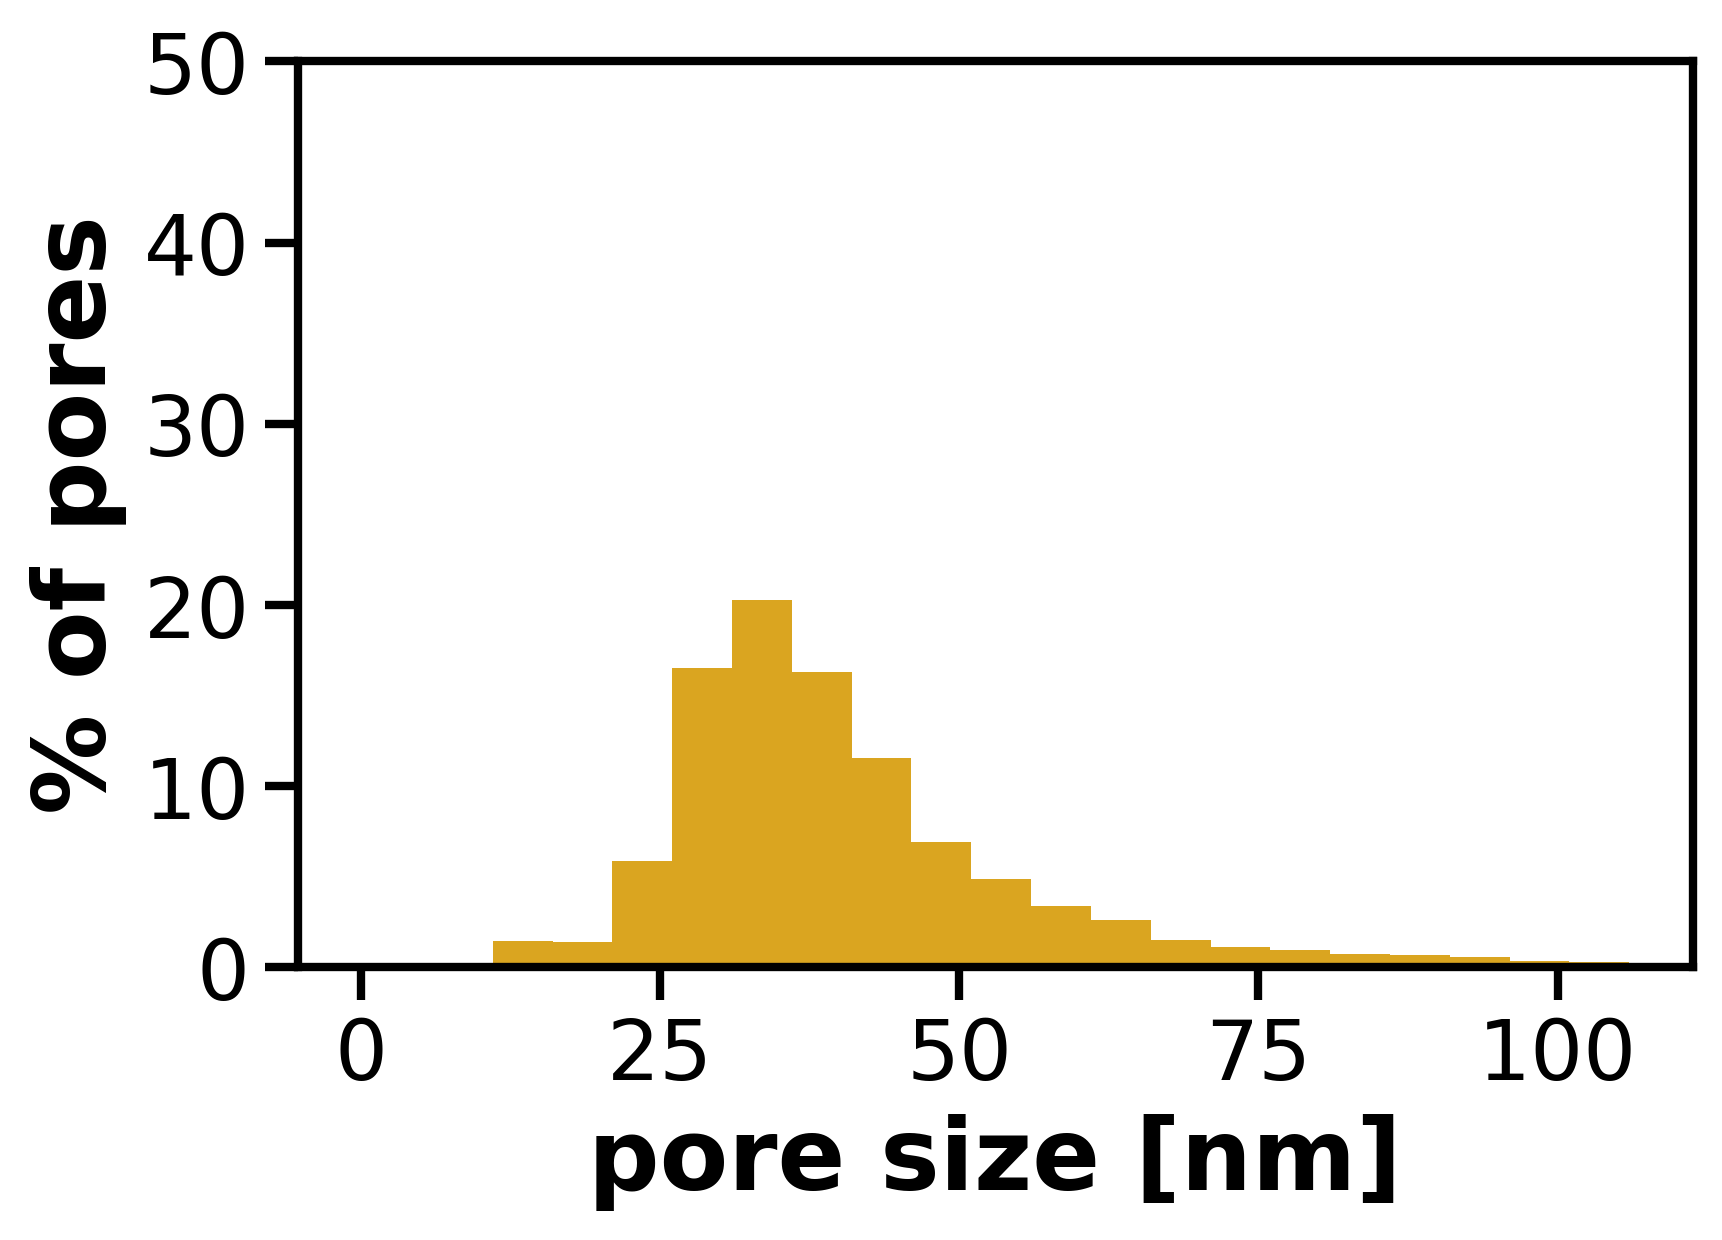

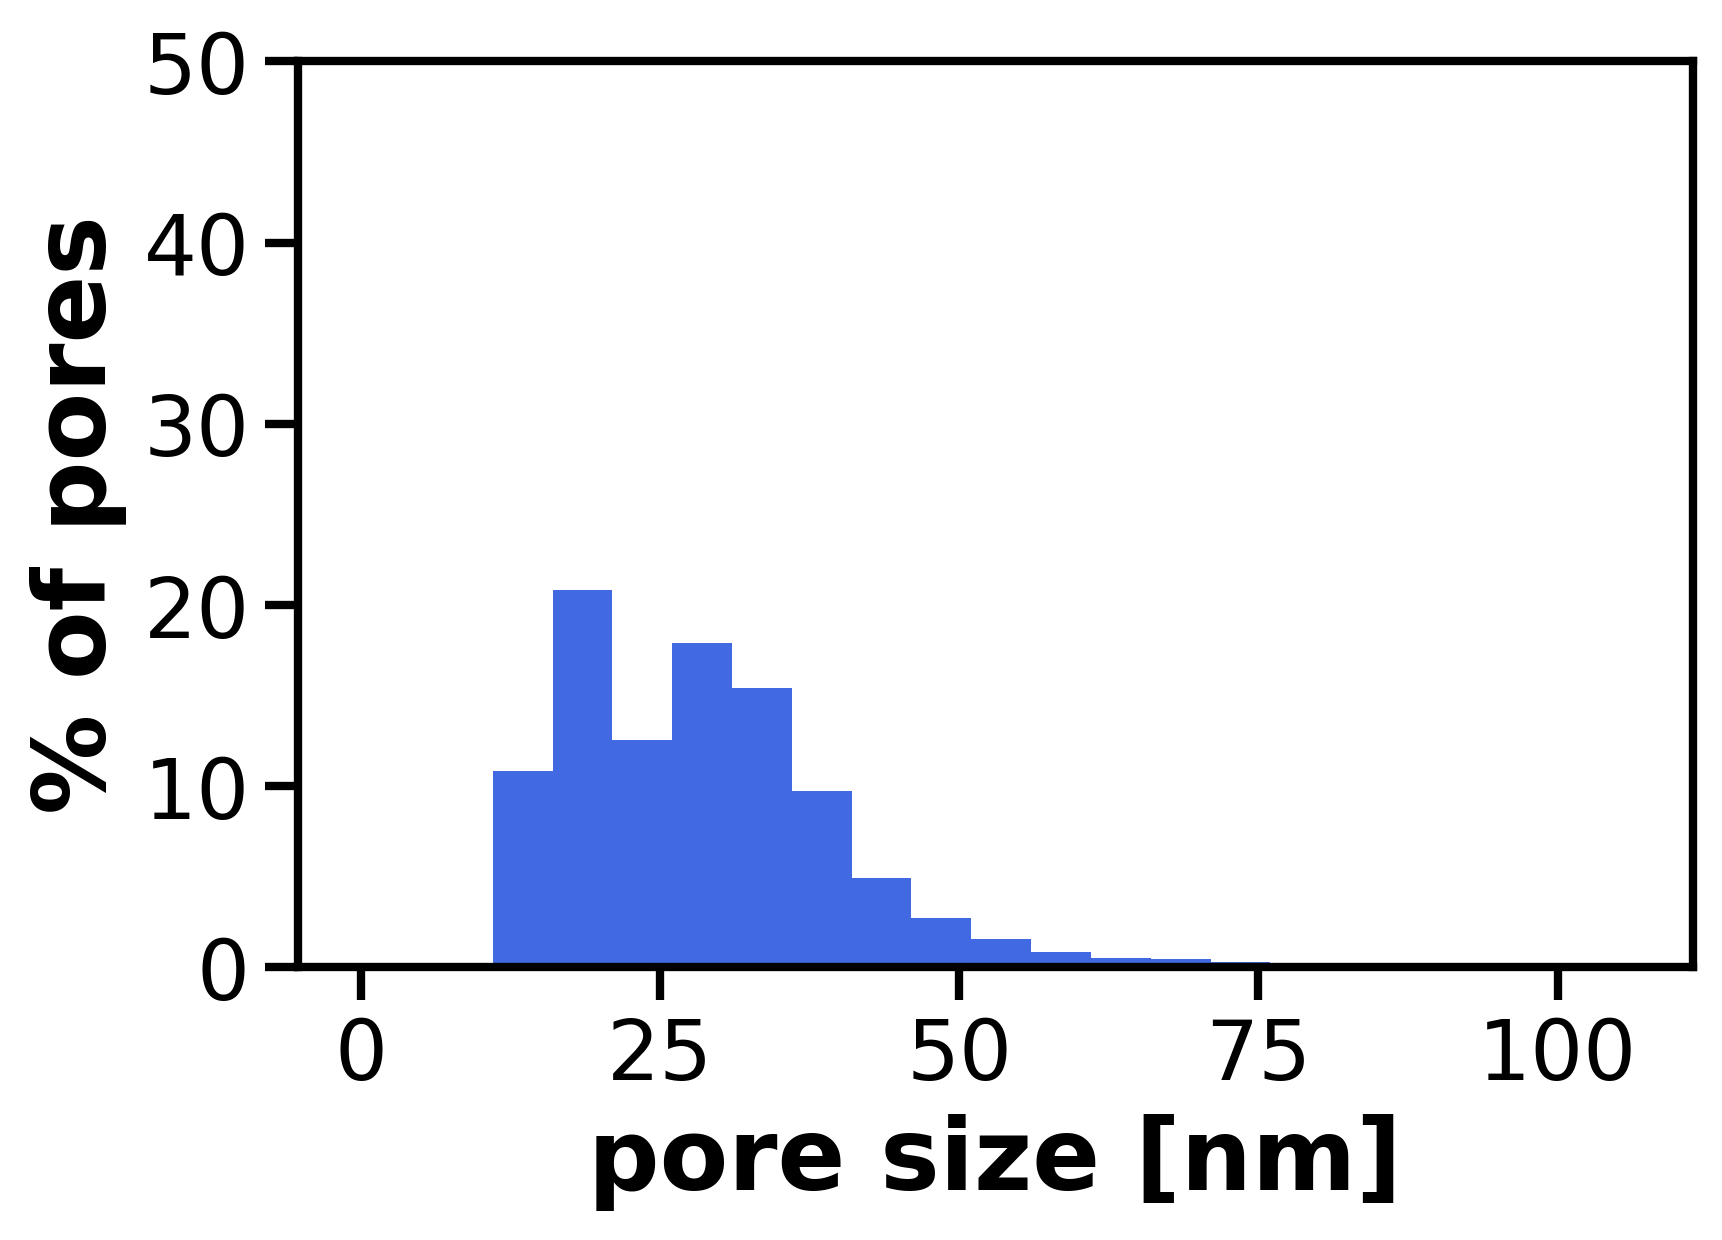

In [24]:
plt.figure(1, dpi=300).tight_layout()
ax = plt.gca()
ax = Deff_vals_NT_hippocampus["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_NT_hippocampus.index) / len(Deff_vals_NT_hippocampus.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96,101,106],color='grey')
ax.yaxis.set_ticks(np.arange(0, 51, 10))
ax.set_ylabel('% of pores', fontsize=24, weight='bold')
ax.set_xlabel('pore size [nm]', fontsize=24, weight='bold')
ax.tick_params(labelsize=20, length=8, width=2)
ax.tick_params(which = 'minor', length=5, width=1)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

plt.figure(2, dpi=300).tight_layout()
ax2.set_title('Normal control')
ax2 = Deff_vals_OGD_hippocampus["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_OGD_hippocampus.index) / len(Deff_vals_OGD_hippocampus.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96,101,106], color='goldenrod')
ax2.yaxis.set_ticks(np.arange(0, 51, 10))
ax2.set_ylabel('% of pores', fontsize=24, weight='bold')
ax2.set_xlabel('pore size [nm]', fontsize=24, weight='bold')
ax2.tick_params(labelsize=20, length=8, width=2)
ax2.tick_params(which = 'minor', length=5, width=1)
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)

plt.figure(3, dpi=300).tight_layout()   
ax3 = fig.add_subplot(3,1,3)
ax3 = Deff_vals_OGD_AZ_hippocampus["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_OGD_AZ_hippocampus.index) / len(Deff_vals_OGD_AZ_hippocampus.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96,101,106], color='royalblue')
ax3.yaxis.set_ticks(np.arange(0, 51, 10))
ax3.set_ylabel('% of pores', fontsize=24, weight='bold')
ax3.set_xlabel('pore size [nm]', fontsize=24, weight='bold')
ax3.tick_params(labelsize=20, length=8, width=2)
ax3.tick_params(which = 'minor', length=5, width=1)
for axis in ['top','bottom','left','right']:
    ax3.spines[axis].set_linewidth(2)


In [20]:
print(min(Deff_vals_NT_hippocampus["Pore size [nm]"]),',', max(Deff_vals_NT_hippocampus["Pore size [nm]"]),',',Deff_vals_NT_hippocampus["Pore size [nm]"].mean())
print(min(Deff_vals_OGD_hippocampus["Pore size [nm]"]),',', max(Deff_vals_OGD_hippocampus["Pore size [nm]"]),',',Deff_vals_OGD_hippocampus["Pore size [nm]"].mean())
print(min(Deff_vals_OGD_AZ_hippocampus["Pore size [nm]"]),',', max(Deff_vals_OGD_AZ_hippocampus["Pore size [nm]"]),',',Deff_vals_OGD_AZ_hippocampus["Pore size [nm]"].mean())

13.970192595059363 , 1414.7971029730475 , 38.691119399751464
13.104589900168298 , 2820.796040035786 , 44.80388055724878
11.178652565113072 , 508.4902062344761 , 29.56189187372852


/Users/mikemckenna/anaconda3/envs/image_analysis/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


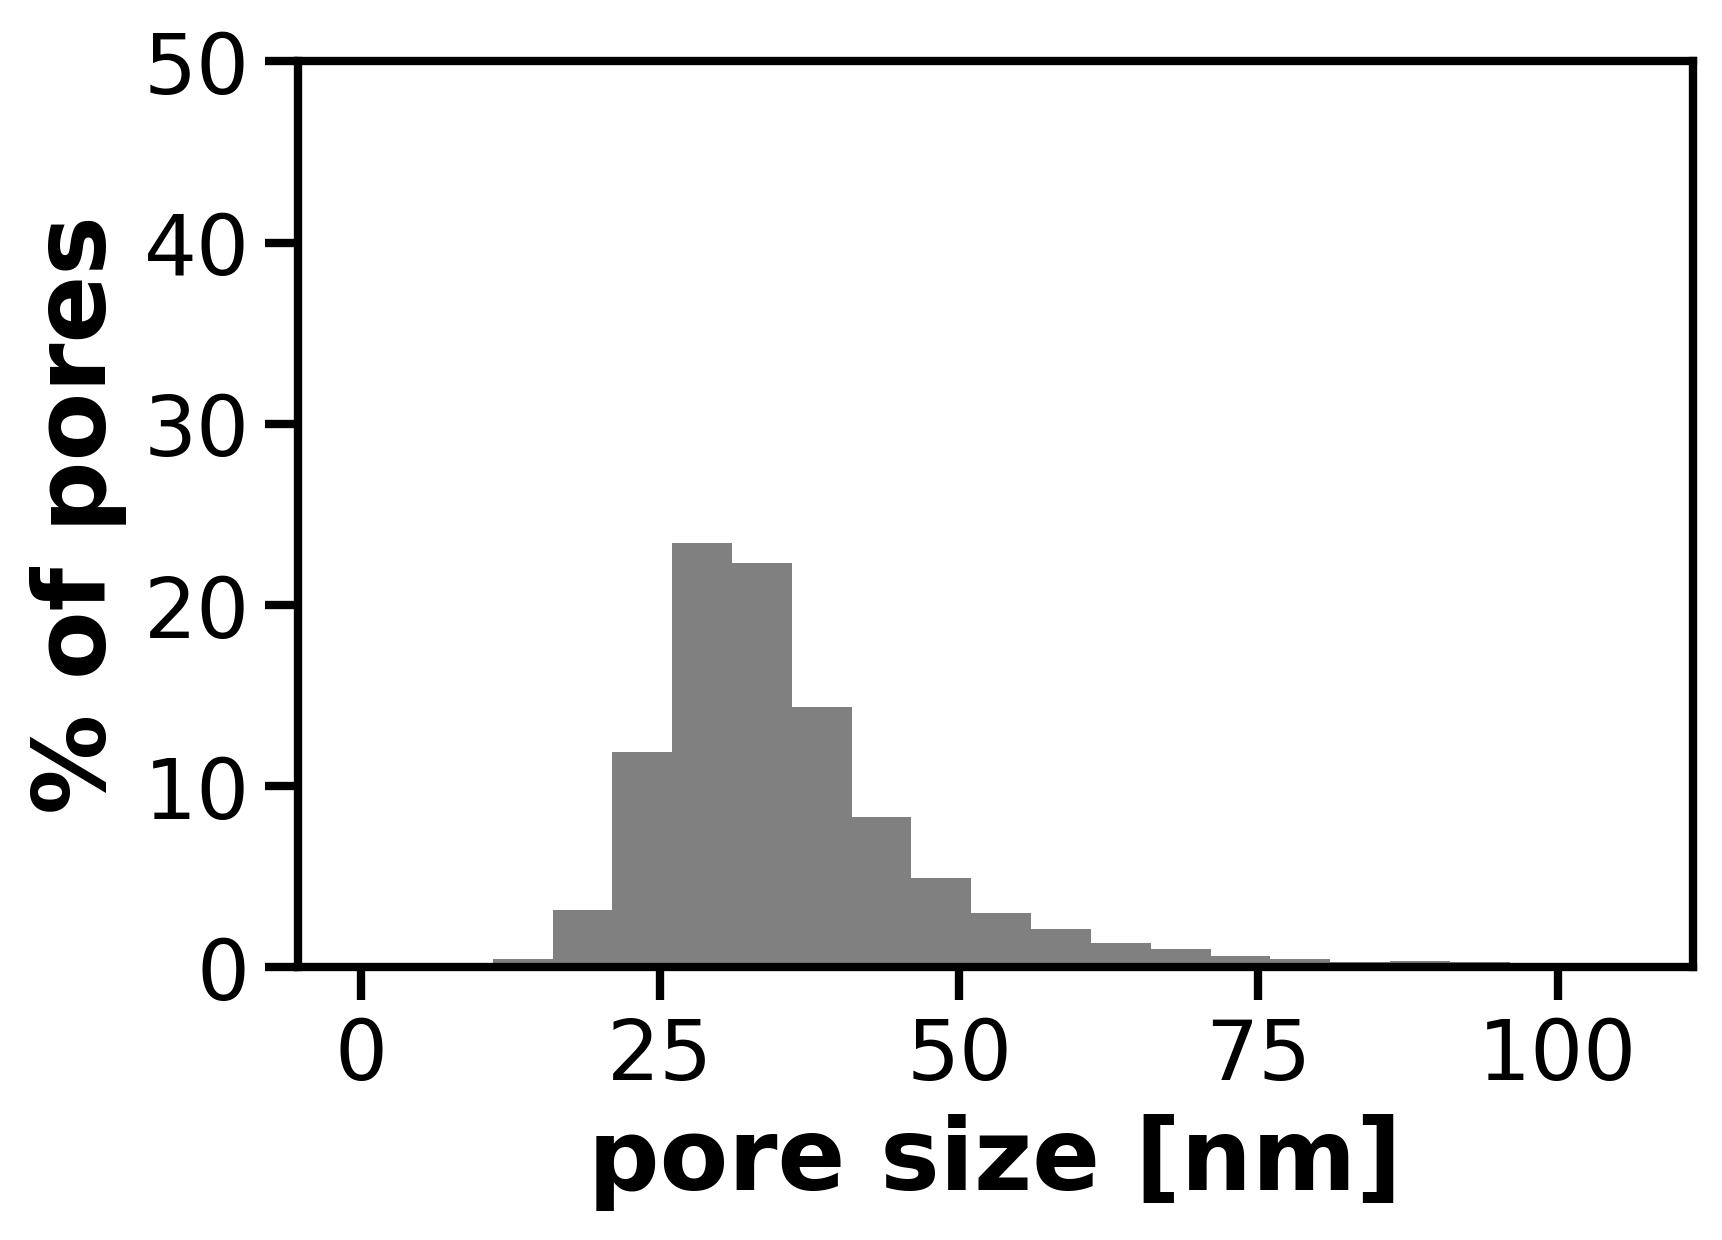

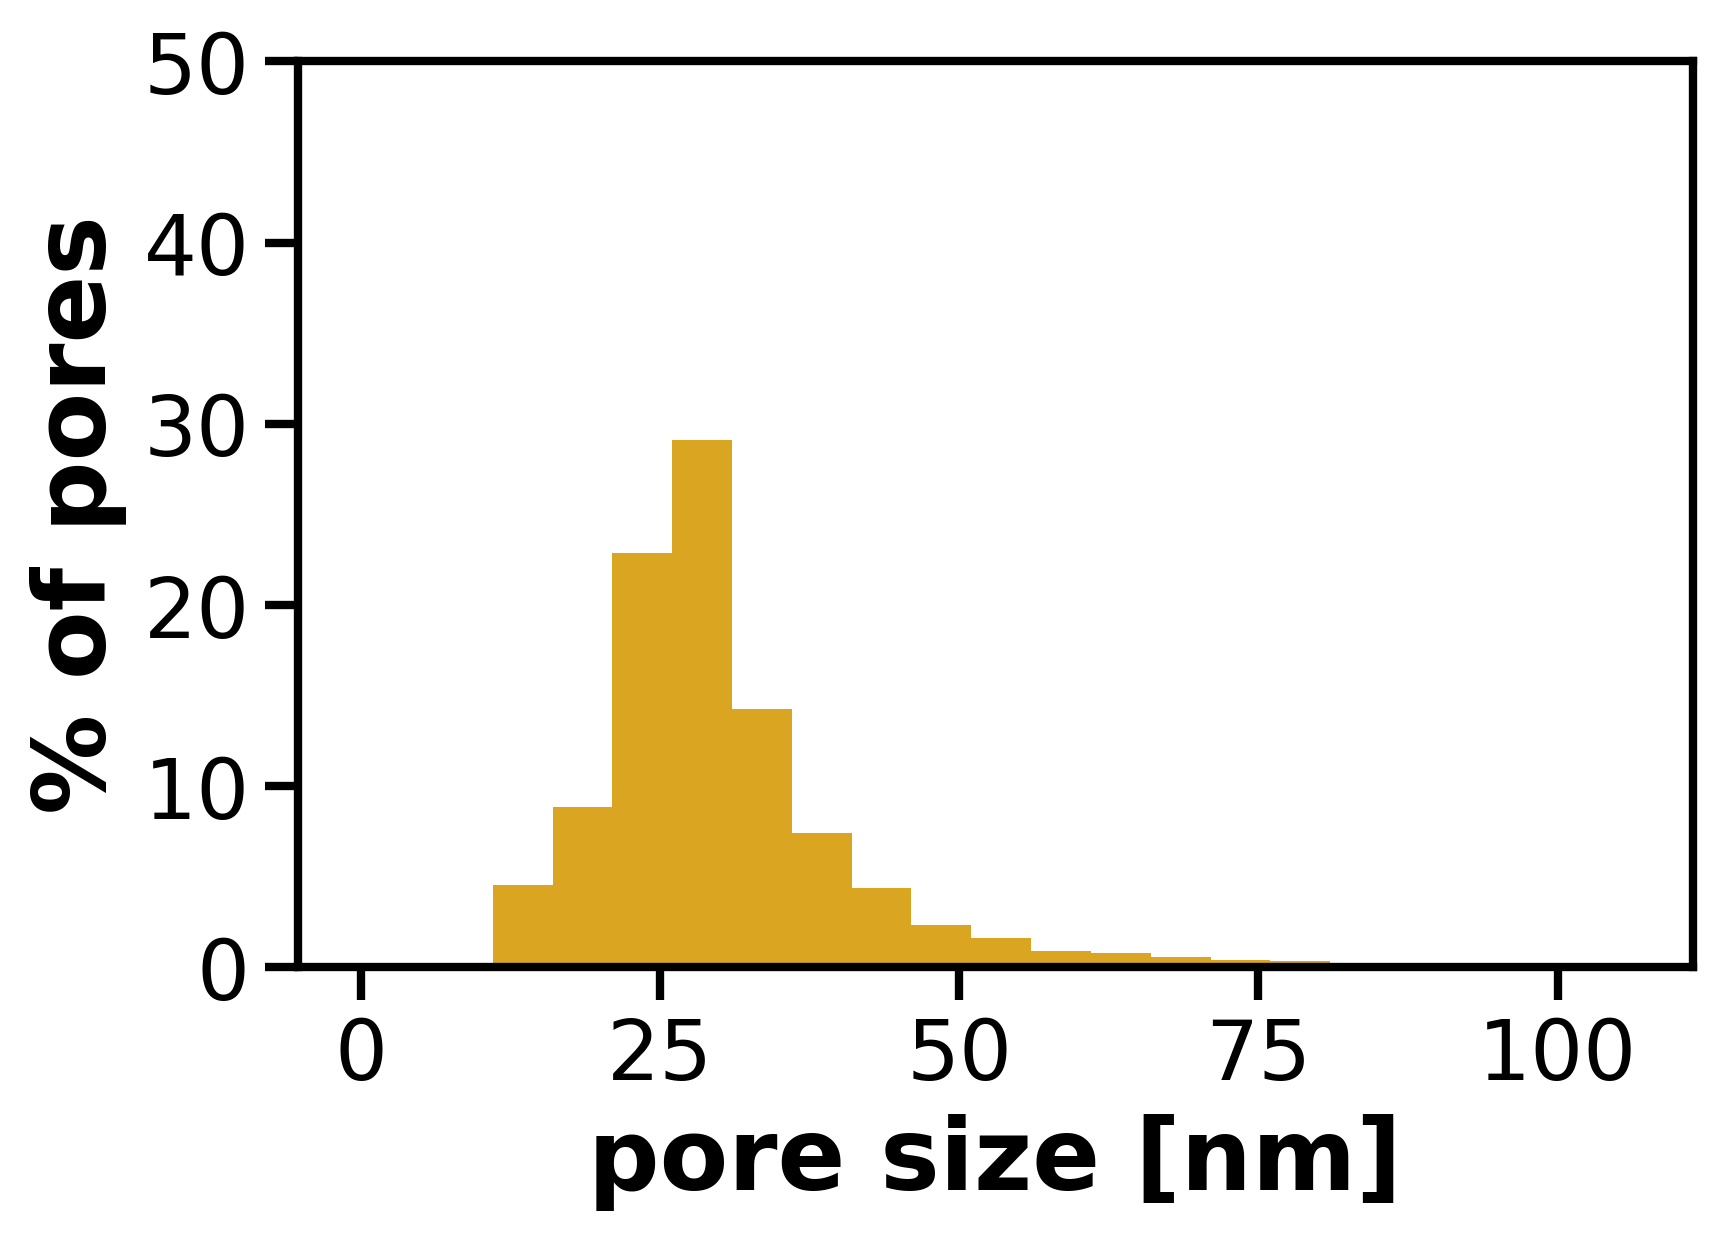

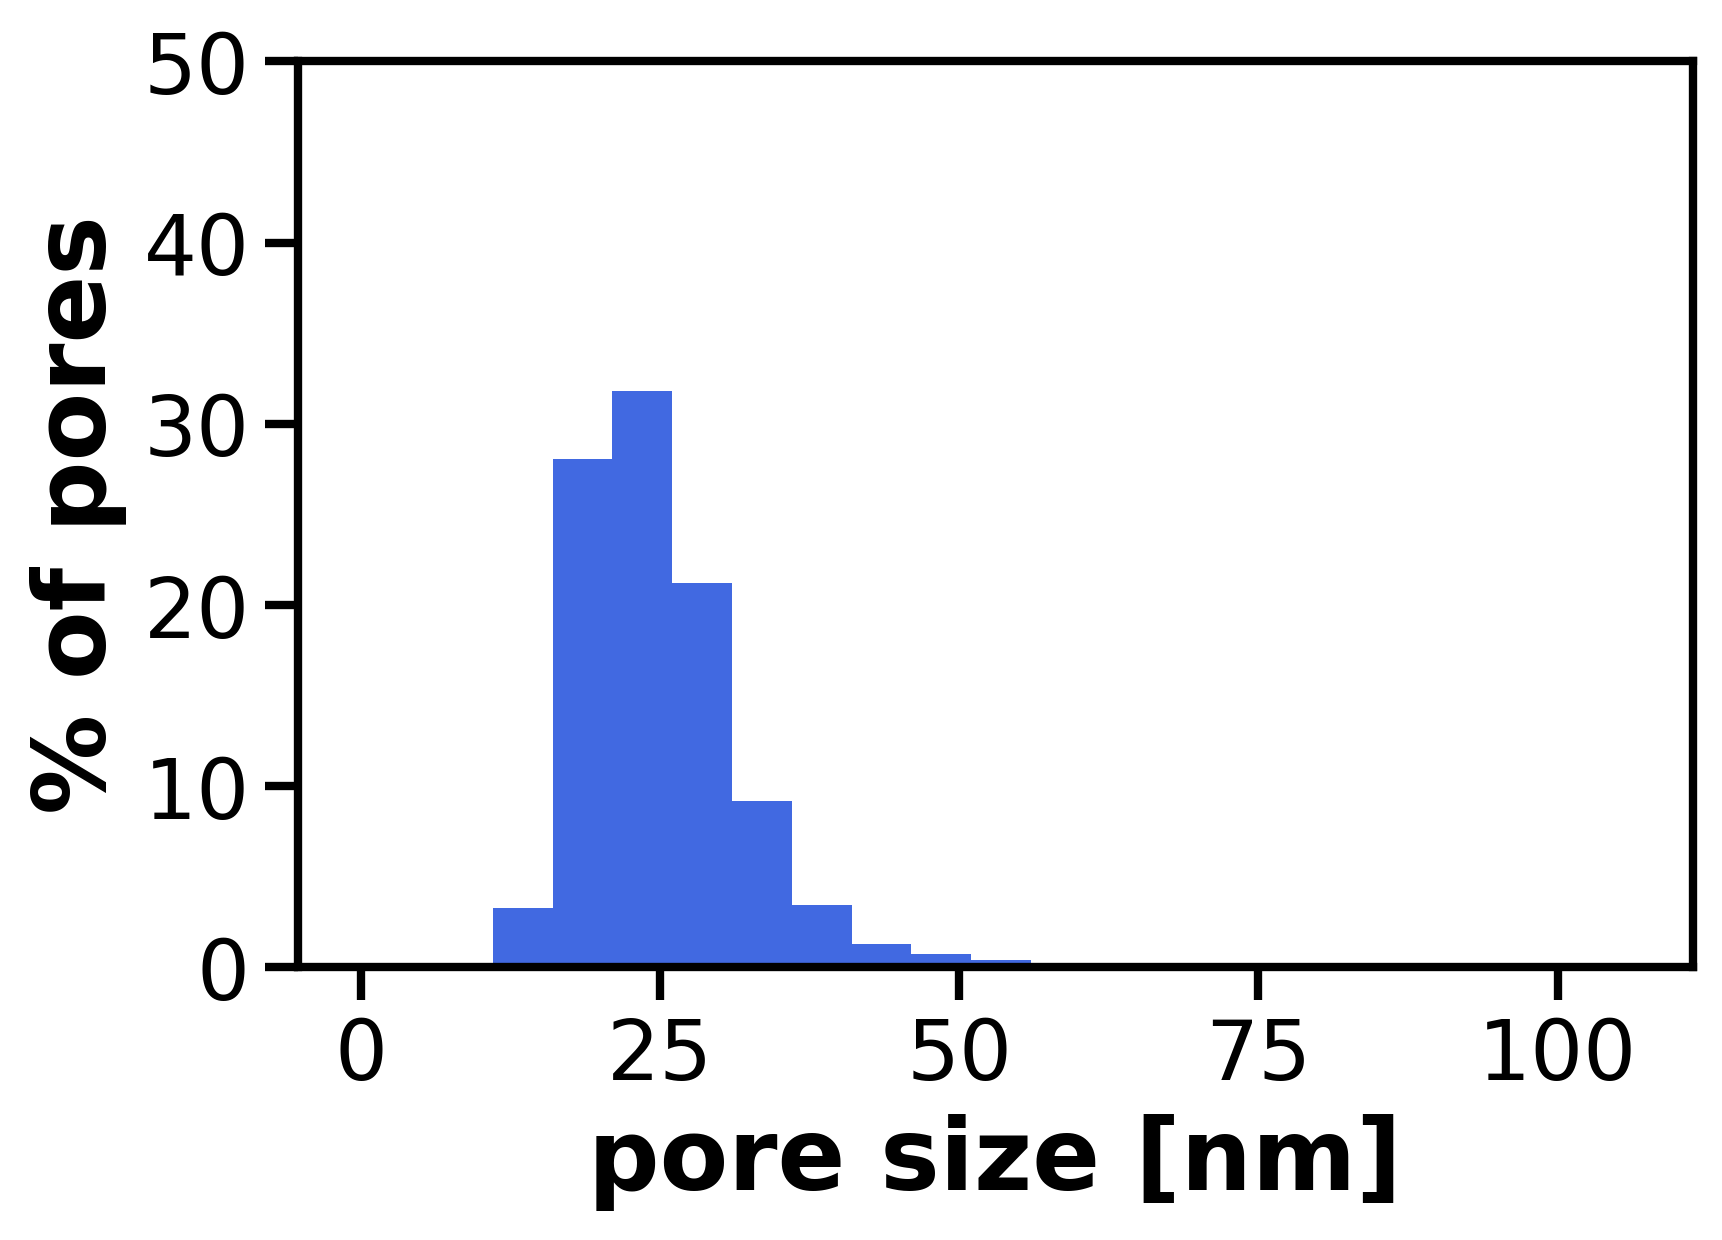

In [23]:
plt.figure(1, dpi=300).tight_layout()
ax = plt.gca()
ax = Deff_vals_NT_thalamus["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_NT_thalamus.index) / len(Deff_vals_NT_thalamus.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96,101,106],color='grey')
ax.yaxis.set_ticks(np.arange(0, 51, 10))
ax.set_ylabel('% of pores', fontsize=24, weight='bold')
ax.set_xlabel('pore size [nm]', fontsize=24, weight='bold')
ax.tick_params(labelsize=20, length=8, width=2)
ax.tick_params(which = 'minor', length=5, width=1)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

plt.figure(2, dpi=300).tight_layout()
ax2.set_title('Normal control')
ax2 = Deff_vals_OGD_thalamus["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_OGD_thalamus.index) / len(Deff_vals_OGD_thalamus.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96,101,106], color='goldenrod')
ax2.yaxis.set_ticks(np.arange(0, 51, 10))
ax2.set_ylabel('% of pores', fontsize=24, weight='bold')
ax2.set_xlabel('pore size [nm]', fontsize=24, weight='bold')
ax2.tick_params(labelsize=20, length=8, width=2)
ax2.tick_params(which = 'minor', length=5, width=1)
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)

plt.figure(3, dpi=300).tight_layout()   
ax3 = fig.add_subplot(3,1,3)
ax3 = Deff_vals_OGD_AZ_thalamus["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_OGD_AZ_thalamus.index) / len(Deff_vals_OGD_AZ_thalamus.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96,101,106], color='royalblue')
ax3.yaxis.set_ticks(np.arange(0, 51, 10))
ax3.set_ylabel('% of pores', fontsize=24, weight='bold')
ax3.set_xlabel('pore size [nm]', fontsize=24, weight='bold')
ax3.tick_params(labelsize=20, length=8, width=2)
ax3.tick_params(which = 'minor', length=5, width=1)
for axis in ['top','bottom','left','right']:
    ax3.spines[axis].set_linewidth(2)


In [21]:
print(min(Deff_vals_NT_thalamus["Pore size [nm]"]),',', max(Deff_vals_NT_thalamus["Pore size [nm]"]),',',Deff_vals_NT_thalamus["Pore size [nm]"].mean())
print(min(Deff_vals_OGD_thalamus["Pore size [nm]"]),',', max(Deff_vals_OGD_thalamus["Pore size [nm]"]),',',Deff_vals_OGD_thalamus["Pore size [nm]"].mean())
print(min(Deff_vals_OGD_AZ_thalamus["Pore size [nm]"]),',', max(Deff_vals_OGD_AZ_thalamus["Pore size [nm]"]),',',Deff_vals_OGD_AZ_thalamus["Pore size [nm]"].mean())

13.707832632679652 , 1327.912612001916 , 37.92981646466656
12.898561498705368 , 1173.960292896994 , 31.801559527261833
13.511180540075094 , 581.4270402510138 , 25.159675295425803


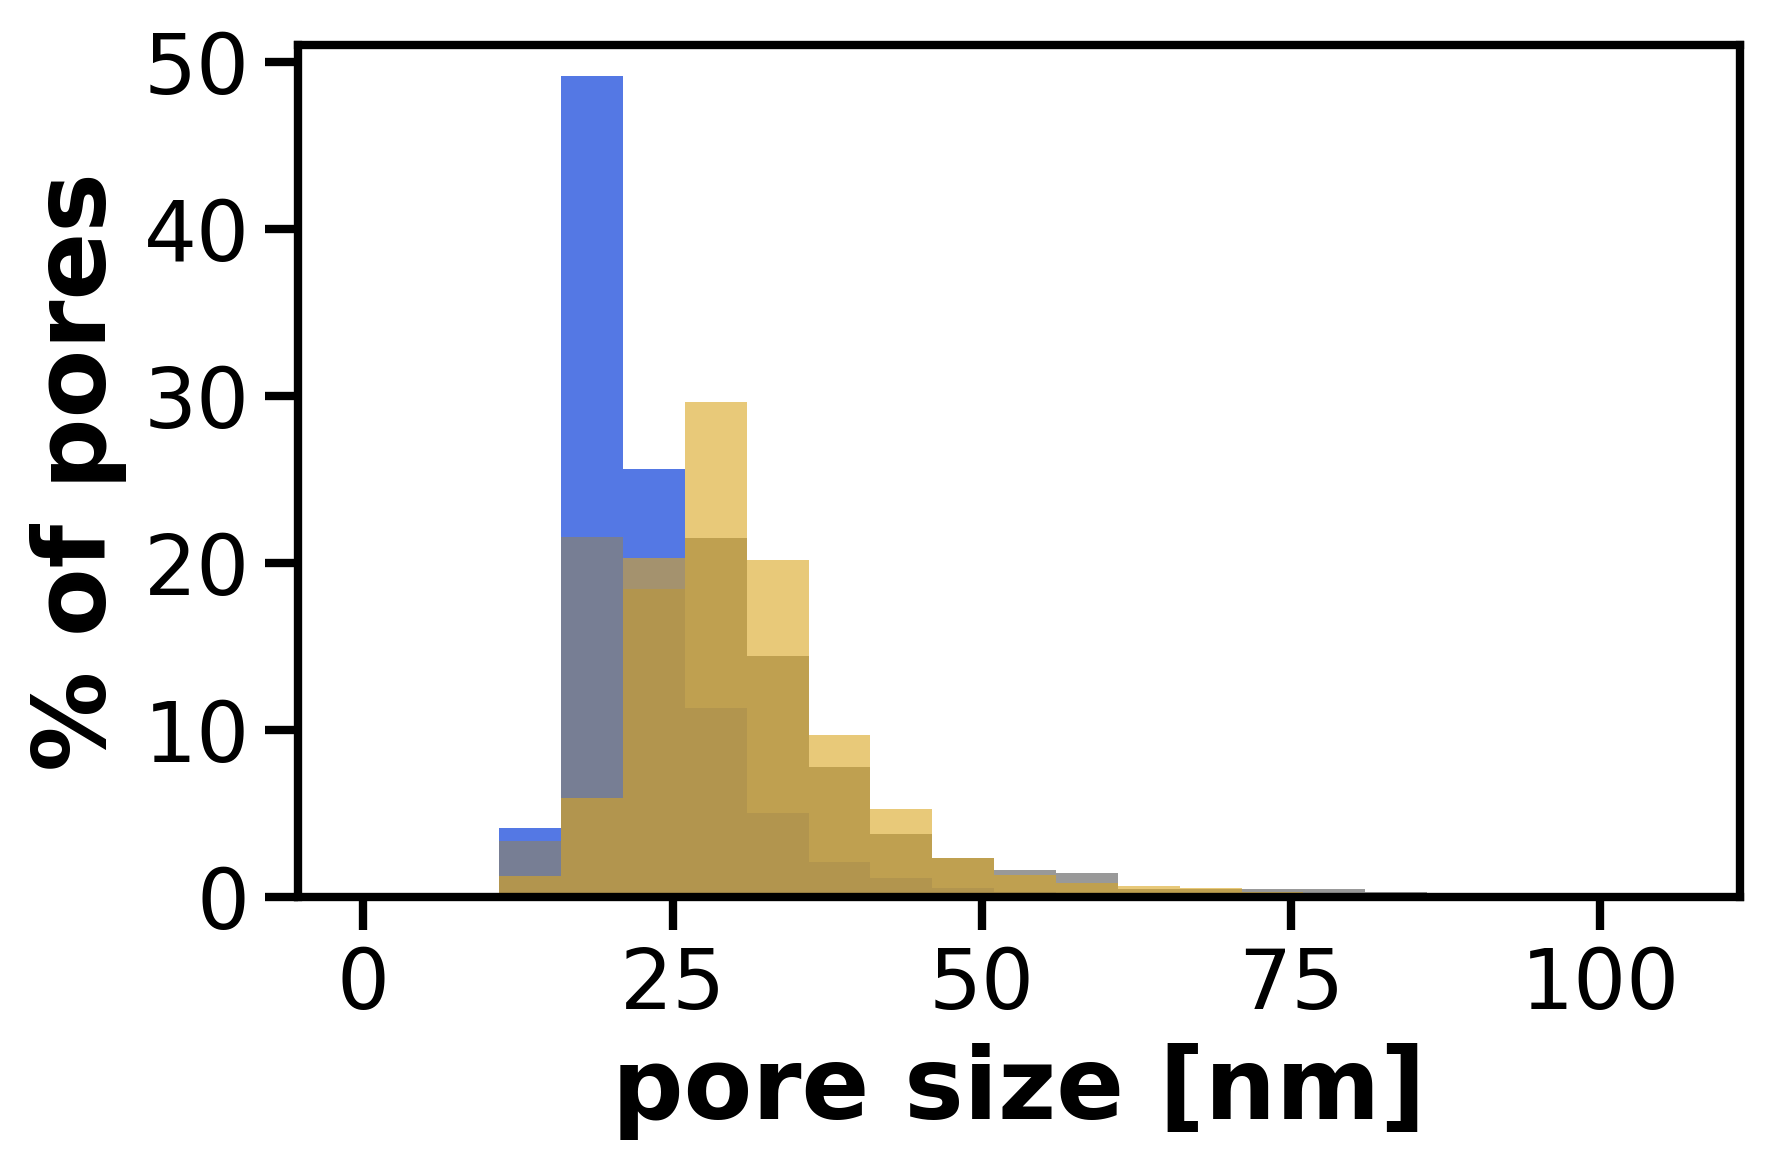

In [61]:
test_bins = np.linspace(1, 106, 22)

plt.rc('axes', linewidth=2)
bins = test_bins
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:])/2

plt.figure(1, dpi=300).tight_layout()
NT_plot = Deff_vals_OGD_AZ_ganglia["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_OGD_AZ_ganglia.index) / len(Deff_vals_OGD_AZ_ganglia.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96,101,106], color='royalblue', alpha=0.9, label='OGD + AZ')
plt.ylim(0, 51)
plt.yticks(np.arange(0, 51, 10))
plt.ylabel('% of pores', fontsize=24, weight='bold')
plt.xlabel('pore size [nm]', fontsize=24, weight='bold')
plt.tick_params(labelsize=20, length=8, width=2)

plt.figure(1, dpi=300).tight_layout()
NT_plot = Deff_vals_NT_ganglia["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_NT_ganglia.index) / len(Deff_vals_NT_ganglia.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96,101,106], color='grey', alpha=0.8,label='NC')
plt.ylim(0, 51)
plt.yticks(np.arange(0, 51, 10))
plt.ylabel('% of pores', fontsize=24, weight='bold')
plt.xlabel('pore size [nm]', fontsize=24, weight='bold')
plt.tick_params(labelsize=20, length=8, width=2)

plt.figure(1, dpi=300).tight_layout()
NT_plot = Deff_vals_OGD_ganglia["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_OGD_ganglia.index) / len(Deff_vals_OGD_ganglia.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96,101,106], color='goldenrod', alpha=0.6,label='OGD')
plt.ylim(0, 51)
plt.yticks(np.arange(0, 51, 10))
plt.ylabel('% of pores', fontsize=24, weight='bold')
plt.xlabel('pore size [nm]', fontsize=24, weight='bold')
plt.tick_params(labelsize=20, length=8, width=2)

#plt.legend(fontsize='x-large', loc=1)
plt.show()

In [52]:
test_bins = np.linspace(1, 106, 22)

In [53]:
test_bins

array([  1.,   6.,  11.,  16.,  21.,  26.,  31.,  36.,  41.,  46.,  51.,
        56.,  61.,  66.,  71.,  76.,  81.,  86.,  91.,  96., 101., 106.])